# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [1]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 3,
        'fully_grown': True,                      
    },
    'data': {
        'number_of_variables': 3, 
        'num_classes': 2,
        
        'function_generation_type': 'random_decision_tree_trained', # 'make_classification' 'random_decision_tree' 'random_decision_tree_trained'
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 1000, #number of samples per function
        'number_of_generated_datasets': 10000,
    }, 
    'computation':{
        'n_jobs': -3,
        'use_gpu': False,
        'gpu_numbers': '0',
        'RANDOM_SEED': 0,   
    }
}


In [2]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

## Imports

In [3]:
from itertools import product       # forms cartesian products
from more_itertools import random_product 
from tqdm import tqdm_notebook as tqdm
import pickle

import numpy as np

import pandas as pd
from joblib import Parallel, delayed

import random 
from random import sample 

import os
import sys

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from sympy import Symbol, sympify

        
import seaborn as sns
        
import random 

import warnings

from time import perf_counter



from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from IPython.display import Image

import numpy as np
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [4]:
#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################
sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [5]:
from utilities.utility_functions import *
#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

#initialize_utility_functions_config_from_curent_notebook(config)

#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='data_creation'))
generate_directory_structure()

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)

In [6]:
print(path_identifier_function_data)

lNetSize1000_numDatasets10000_var3_class2_random_decision_tree_trained_xMax1_xMin0_xDistuniform_depth3_fullyGrown


# Function Generation

In [7]:
if function_generation_type == 'random_decision_tree':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_decision_tree_data)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))
elif function_generation_type == 'random_decision_tree_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_decision_tree_data_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))  
elif function_generation_type == 'make_classification':
    pass
    
function_identifier_list = generate_decision_tree_identifier(config)  
identifier_series_list = [pd.Series(result[0],  index=function_identifier_list) for result in result_list]

function_df = pd.DataFrame(data=np.array([result[0] for result in result_list]), columns=function_identifier_list)

X_data_list = [[identifier_series, pd.DataFrame(result[1], columns=['x' + str(i) for i in range(number_of_variables)])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_list = [[identifier_series, pd.DataFrame(result[2], columns=['result'])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_raw_list = [[identifier_series, pd.DataFrame(result[3], columns=['result_raw'])] for identifier_series, result in zip(identifier_series_list, result_list)]


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-3)]: Done  84 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-3)]: Done 244 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-3)]: Done 468 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-3)]: Done 756 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-3)]: Done 1108 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-3)]: Done 1524 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-3)]: Done 2004 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-3)]: Done 2548 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-3)]: Done 3156 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-3)]: Done 3828 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-3)]: Done 4564 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-3)]: Done 5364 tasks      | elapsed: 79.7min
[Parallel(n_jobs=-3)]: Done 6228 tasks      | elapsed: 92.5min
[Parallel(n_jobs=-3)]: Done 7156 tasks      | elapsed: 106.2min
[Parallel(n_jobs=-3)]: Done 8148 tasks      

In [8]:
function_df.head()

,f0v0,f0v1,f0v2,f1v0,f1v1,f1v2,f2v0,f2v1,f2v2,f3v0,f3v1,f3v2,f4v0,f4v1,f4v2,f5v0,f5v1,f5v2,f6v0,f6v1,f6v2,b0,b1,b2,b3,b4,b5,b6,lp0c0,lp0c1,lp1c0,lp1c1,lp2c0,lp2c1,lp3c0,lp3c1,lp4c0,lp4c1,lp5c0,lp5c1,lp6c0,lp6c1,lp7c0,lp7c1
0,-0.376,-0.271,-0.255,-0.345,0.521,-0.274,-0.161,-0.432,0.544,0.376,-0.341,0.314,0.051,0.109,0.373,-0.136,-0.291,-0.029,0.408,-0.311,-0.032,0.449,0.496,-0.204,-0.016,0.453,0.464,-0.257,0.166,-0.101,-0.007,-0.311,0.272,0.184,-0.160,0.038,0.068,-0.088,0.010,-0.279,0.216,0.221,-0.227,-0.146
1,-0.317,0.196,0.524,-0.079,0.574,0.447,0.241,-0.015,-0.544,-0.522,-0.108,-0.225,-0.546,0.358,0.475,-0.298,0.358,-0.327,0.071,0.425,0.028,0.421,-0.244,-0.434,0.436,0.309,0.281,-0.305,-0.298,-0.331,0.136,0.251,0.021,-0.031,-0.206,0.146,-0.207,-0.338,0.016,0.094,0.156,-0.090,-0.118,-0.106
2,0.177,-0.094,-0.055,-0.110,-0.026,-0.009,-0.163,0.065,0.052,-0.080,-0.049,-0.043,-0.009,-0.041,-0.055,0.232,0.311,-0.321,0.000,0.000,0.000,-0.088,-0.060,0.099,-0.088,-0.061,-0.104,0.000,0.010,-0.010,-0.063,0.062,-0.180,0.181,-0.296,0.296,-0.258,0.246,0.393,-0.436,-0.000,0.000,0.000,-0.000
3,0.292,-0.022,-0.470,0.028,0.361,-0.174,-0.121,0.310,0.115,-0.290,0.495,-0.325,-0.323,0.365,0.056,0.156,-0.455,-0.139,-0.297,-0.568,0.490,-0.430,-0.101,-0.047,0.281,-0.002,-0.072,0.403,0.195,-0.054,-0.276,0.001,0.197,0.080,-0.113,0.087,0.251,0.214,0.238,-0.186,0.293,0.296,-0.266,-0.139
4,0.508,0.226,0.054,0.442,-0.309,0.409,-0.272,0.404,-0.225,0.187,0.079,-0.210,-0.084,-0.467,-0.180,0.401,-0.287,0.436,-0.235,-0.499,-0.519,0.574,-0.276,0.319,-0.266,-0.095,0.100,0.306,0.135,-0.119,0.280,-0.285,0.230,0.292,0.046,0.282,0.195,0.021,-0.096,0.241,0.131,0.010,-0.315,0.072


In [9]:
X_data_list[0][0].head(10)

f0v0   -0.376
f0v1   -0.271
f0v2   -0.255
f1v0   -0.345
f1v1    0.521
f1v2   -0.274
f2v0   -0.161
f2v1   -0.432
f2v2    0.544
f3v0    0.376
dtype: float32

In [10]:
X_data_list[0][1].head(10)

,x0,x1,x2
0,0.549,0.715,0.603
1,0.545,0.424,0.646
2,0.438,0.892,0.964
3,0.383,0.792,0.529
4,0.568,0.926,0.071
5,0.087,0.020,0.833
6,0.778,0.870,0.979
7,0.799,0.461,0.781
8,0.118,0.640,0.143
9,0.945,0.522,0.415


In [11]:
y_data_list[0][0].head(10)

f0v0   -0.376
f0v1   -0.271
f0v2   -0.255
f1v0   -0.345
f1v1    0.521
f1v2   -0.274
f2v0   -0.161
f2v1   -0.432
f2v2    0.544
f3v0    0.376
dtype: float32

In [12]:
y_data_list[2][1].head(10)

,result
0,0.000
1,1.000
2,1.000
3,0.000
4,1.000
5,1.000
6,1.000
7,1.000
8,1.000
9,0.000


In [13]:
y_data_raw_list[2][1].head(10)

,result_raw
0,0.470
1,0.517
2,0.518
3,0.471
4,0.518
5,0.518
6,0.521
7,0.518
8,0.518
9,0.469


In [14]:
some_tree = generate_decision_tree_from_array(y_data_list[0][0].values, config)

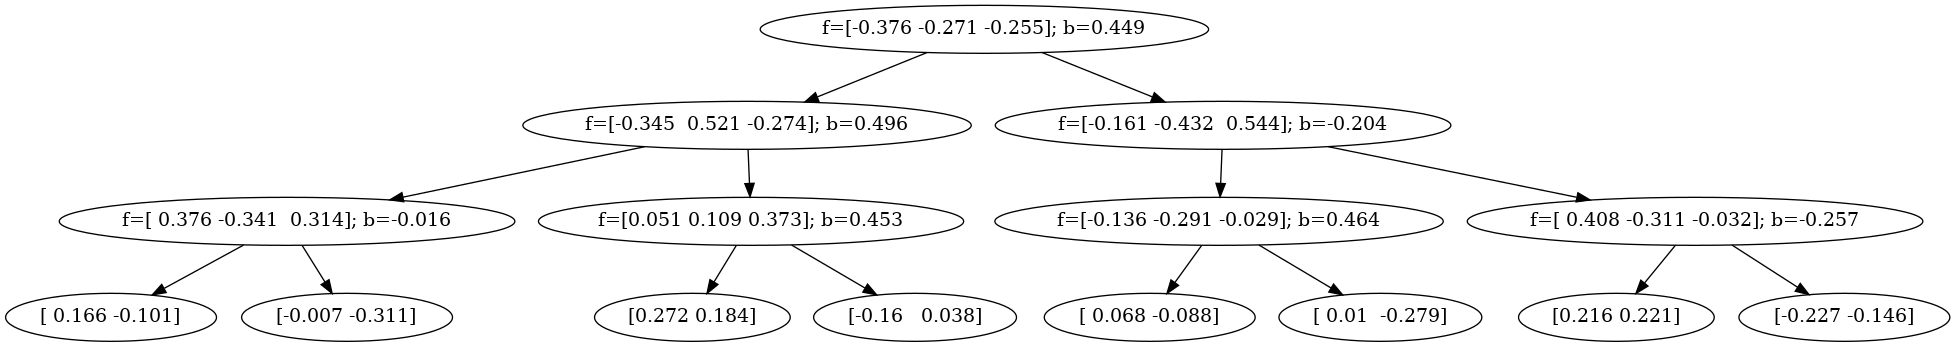

In [15]:
some_tree.plot_tree()


In [16]:
path_functions = './data/saved_function_lists/functions_' + path_identifier_function_data + '.csv'
function_df.to_csv(path_functions, index=False)

path_X_data = './data/saved_function_lists/X_data_' + path_identifier_function_data + '.pkl'
with open(path_X_data, 'wb') as f:
    pickle.dump(X_data_list, f)
    
path_y_data = './data/saved_function_lists/y_data_' + path_identifier_function_data + '.pkl'
with open(path_y_data, 'wb') as f:
    pickle.dump(y_data_list, f)
